In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Strategie():
    CHANGER = 1
    GARDER = 2
    RANDOM = 3

In [3]:
def play_game(strategie):
    
    portes = [0, 1, 2]

    # Random: choosing the right door
    bonne_porte = np.random.randint(3)

    # Player's choice
    premier_choix = np.random.randint(3)

    # We have two doors left
    portes.remove(premier_choix)

    # The presenter removes a door
    if premier_choix == bonne_porte:
        portes.remove(portes[np.random.randint(2)])
    else:
        portes = [bonne_porte]

    deuxieme_choix = 0
    # The second choice depends on the strategy, (change or not)
    if strategie == Strategie.CHANGER:
        deuxieme_choix = portes[0]
    elif strategie == Strategie.GARDER:
        deuxieme_choix = premier_choix
    elif strategie == Strategie.RANDOM:
        new_portes = [portes[0], premier_choix]
        deuxieme_choix = new_portes[np.random.randint(2)]
    else:
        raise ValueError("Strategy not recognized!")
    result =  deuxieme_choix == bonne_porte
    # return a Numpy table of the player's winnings
    return result


In [4]:
def run_game(strategie, nb_tours):
    return [1 if play_game(strategie) else 0 for i in range(nb_tours)]

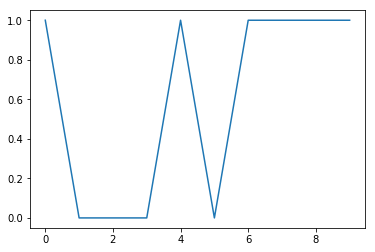

In [5]:
a = run_game(Strategie.CHANGER, 10)
plot = plt.plot(a)

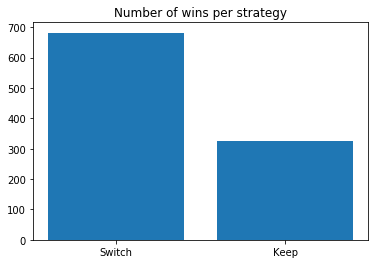

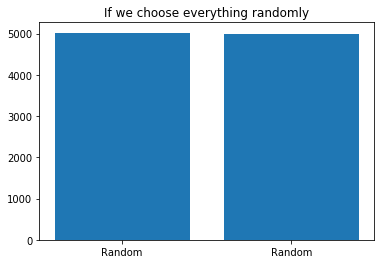

In [6]:
x1 = np.sum(run_game(Strategie.CHANGER, 1000))
x2 = np.sum(run_game(Strategie.GARDER, 1000))
x3 = np.sum(run_game(Strategie.RANDOM, 1000))
fig = plt.figure()
plt.title("Number of wins per strategy")
plot = plt.bar([1,2],[x1, x2], 
        tick_label=["Switch","Keep"])

# if we choose everything randomly
x3 = sum(run_game(Strategie.RANDOM, 10000))
x4 = 10000-x3
figure = plt.figure()
plt.title("If we choose everything randomly")
plot2 = plt.bar([3,4],[x3, x4], 
       tick_label=["Random","Random"])



In [7]:
gains_changer =[]
gains_garder = []
gains_random = []
samples =  [100, 200, 300, 500, 800, 1000]
for tours in samples:
    gains_changer.append(np.sum(run_game(Strategie.CHANGER, tours)))
    gains_garder.append(np.sum(run_game(Strategie.GARDER, tours)))
    gains_random.append(np.sum(run_game(Strategie.RANDOM, tours)))

In [8]:
print(gains_changer)
print(gains_changer)

[58, 135, 220, 345, 553, 668]
[58, 135, 220, 345, 553, 668]


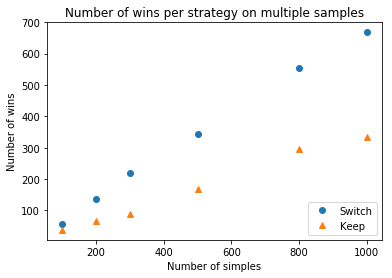

In [9]:
fig = plt.figure() 
plt.title("Number of wins per strategy on multiple samples")
plot = plt.plot(samples, gains_changer,'o', label='Switch')
plot = plt.plot(samples, gains_garder, '^', label='Keep')
plt.legend(loc='lower right');
plt.xlabel("Number of simples")
plt.ylabel("Number of wins")
plt.show()

